### RQ3 : Microtask learning increases classification accuracy
####  Null hypothesis: There is no difference in {learning, motivation, classification accruacy} between Group A and Group B

In [1]:
%pylab inline
import pandas as pd 
import fnmatch
import scipy.stats as stats
import os
from collections import Counter
from  stats_helper import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
users = pd.read_csv("Crowdclass_Data.csv")
dataA = users[users["Group"]=="A"]
dataB = users[users["Group"]=="B"]

## I ) Simple accuracy measures

$$accuracy = \frac{\sum_c right}{\sum_c right+ \sum_c wrong }$$ where c = class = {bar,bulge,dust,edge,elliptical,lens,merging,spiral,tidal}

- conduct separate analysis on both *_gz and *_expert 

In [21]:
headers = list(users.columns)
right_gz_filtered_headers = fnmatch.filter(headers, '*right_gz') 
wrong_gz_filtered_headers = fnmatch.filter(headers, '*wrong_gz') 

In [22]:
num_wrong = np.sum(dataA[wrong_gz_filtered_headers],axis=1)
num_right = np.sum(dataA[right_gz_filtered_headers],axis=1)
A_overall_accuracy = np.array(num_right/(num_wrong+num_right))
num_wrong = np.sum(dataB[wrong_gz_filtered_headers],axis=1)
num_right = np.sum(dataB[right_gz_filtered_headers],axis=1)
B_overall_accuracy = np.array(num_right/(num_wrong+num_right))
A_overall_accuracy = A_overall_accuracy[~numpy.isnan(A_overall_accuracy)]
B_overall_accuracy = B_overall_accuracy[~numpy.isnan(B_overall_accuracy)]

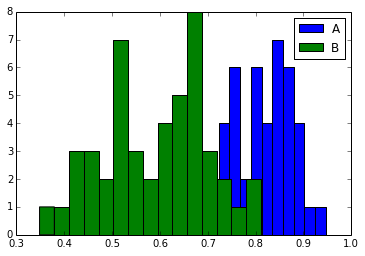

In [23]:
plt.hist(A_overall_accuracy,bins=15,label="A")
plt.hist(B_overall_accuracy,bins=15,label="B")
plt.legend()

The overall accuracy for the B participants is less than the accuracy for A participants. 

In [24]:
def single_bar_chart(dataA,dataB, N=1,width=0.3,title=""):
	AMeans = mean(dataA)
	BMeans = mean(dataB)
	# Astd = [std(dataA), std(A_posttest_score)]
	# Bstd =[std(dataB), std(B_posttest_score)]
	A_yerr = np.array(stats.t.interval(0.95,len(dataA)-1,loc = mean(dataA), scale=stats.sem(dataA))- mean(dataA))
	B_yerr =np.array(stats.t.interval(0.95,len(dataB)-1,loc = mean(dataB), scale=stats.sem(dataB))- mean(dataB))
	ind = np.arange(N)  # the x locations for the groups
	fig, ax = plt.subplots()
	rects1 = ax.bar(ind, mean(dataA), width, color='r',ecolor= "black",yerr = A_yerr[0])
	rects2 = ax.bar( ind+width, mean(dataB), width, color='b',ecolor= "black",yerr = B_yerr[0])

	# add some text for labels, title and axes ticks
	ax.set_ylabel('Scores',fontsize=14)
	ax.set_title(title,fontsize=16)
	ax.set_xticks([width])
	ax.set_xticklabels(('Pre-test', 'Post-test'),fontsize=14)
	ax.legend((rects1[0], rects2[0]), ('A', 'B'))

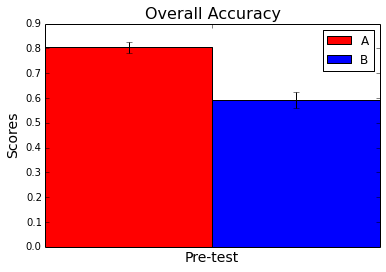

In [25]:
single_bar_chart(A_overall_accuracy,B_overall_accuracy,width=0.1,title="Overall Accuracy")

In [60]:
def single_bar_chart(dataA,dataB, N=1,width=0.3,title=""):
    AMeans = mean(dataA)
    BMeans = mean(dataB)
    # Astd = [std(dataA), std(A_posttest_score)]
    # Bstd =[std(dataB), std(B_posttest_score)]
    A_yerr = np.array(stats.t.interval(0.95,len(dataA)-1,loc = mean(dataA), scale=stats.sem(dataA))- mean(dataA))
    B_yerr = np.array(stats.t.interval(0.95,len(dataB)-1,loc = mean(dataB), scale=stats.sem(dataB))- mean(dataB))
    ind = np.arange(N)  # the x locations for the groups
    ax = plt.subplot(121)
    rects1 = ax.bar(ind, mean(dataA), width=width, color='r',ecolor= "black",yerr = A_yerr[0])
    rects2 = ax.bar( ind+width, mean(dataB), width=width, color='b',ecolor= "black",yerr = B_yerr[0])

    # add some text for labels, title and axes ticks
#     ax.set_ylabel('Rate [images/min]',fontsize=14)
    ax.set_title(title,fontsize=16)
    ax.set_xticks([width])
    ax.set_xticklabels((''),fontsize=14)
    ax.set_yticklabels(np.arange(0,0.91,0.1),fontsize=13)
#     ax.legend((rects1[0], rects2[0]), ('A', 'B'))
    def autolabel(rects):
        # attach some text labels
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 0.5*height,
                    '%.2f' % float(height),
                    ha='center', va='bottom',color="white",fontsize=15)

    autolabel(rects1)
    autolabel(rects2)
    print AMeans, BMeans, A_yerr,B_yerr

0.797819475629 0.576738368404 [-0.02  0.02] [-0.03  0.03]


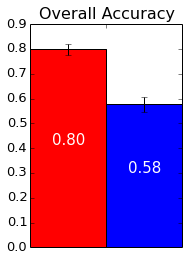

In [61]:
single_bar_chart(A_overall_accuracy,B_overall_accuracy,width=0.1,title="Overall Accuracy")

In [26]:
A = A_overall_accuracy
B = B_overall_accuracy

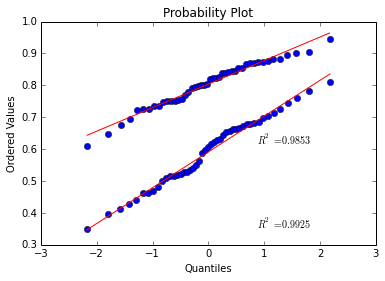

In [27]:
plt.figure()
plt1 = stats.probplot(A, dist="norm", plot=pylab)
plt3 = stats.probplot(B, dist="norm", plot=pylab)

In [29]:
run_all_non_parametric_analysis(A,B)

---------------------------------------------------------------------------------

Median
A:  0.813383534418
B:  0.606060606061
A > B
------
A: mu = 0.804; std = 0.072
B: mu = 0.591; std = 0.109
A : W = 0.97 ; p =0.296167969704 ---> Normal
B : W = 0.98 ; p =0.594419419765 ---> Normal
	Wilcoxon rank sum test with continuity correction

data:  GroupA and GroupB

W = 2052, p-value = 8.811e-14

alternative hypothesis: true location shift is not equal to 0

	Exact Wilcoxon-Mann-Whitney Test

data:  v by g (GroupA, GroupB)

Effect Size  = 0.773711137506 -----> Large
Z = 7.4614, p-value < 2.2e-16

alternative hypothesis: true mu is not equal to 0

Mean ranks of group
[1] 68.1087

Mean ranks of group
[1] 26.34043



### Compare to expert

In [38]:
right_expert_filtered_headers = fnmatch.filter(headers, '*right_expert') 
wrong_expert_filtered_headers = fnmatch.filter(headers, '*wrong_expert') 

In [39]:
num_wrong = np.sum(dataA[wrong_expert_filtered_headers],axis=1)
num_right = np.sum(dataA[right_expert_filtered_headers],axis=1)
A_overall_accuracy = np.array(num_right/(num_wrong+num_right))
num_wrong = np.sum(dataB[wrong_expert_filtered_headers],axis=1)
num_right = np.sum(dataB[right_expert_filtered_headers],axis=1)
B_overall_accuracy = np.array(num_right/(num_wrong+num_right))

A_overall_accuracy = A_overall_accuracy[~numpy.isnan(A_overall_accuracy)]
B_overall_accuracy = B_overall_accuracy[~numpy.isnan(B_overall_accuracy)]

In [40]:
A = A_overall_accuracy
B = B_overall_accuracy

0.797819475629 0.576738368404 [-0.02  0.02] [-0.03  0.03]


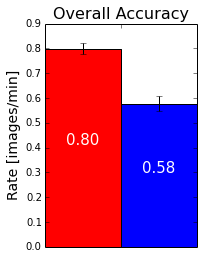

In [41]:
single_bar_chart(A,B,width=0.1,title="Overall Accuracy")

In [33]:
run_all_non_parametric_analysis(A,B)

---------------------------------------------------------------------------------

Median
A:  0.803285439736
B:  0.597014925373
A > B
------
A: mu = 0.798; std = 0.074
B: mu = 0.577; std = 0.1
A : W = 0.95 ; p =0.0367332436144 ---> NOT Normal
B : W = 0.96 ; p =0.119422905147 ---> Normal
	Wilcoxon rank sum test with continuity correction

data:  GroupA and GroupB

W = 2088, p-value = 1.04e-14

alternative hypothesis: true location shift is not equal to 0

	Exact Wilcoxon-Mann-Whitney Test

data:  v by g (GroupA, GroupB)

Effect Size  = 0.802403590899 -----> Large
Z = 7.7381, p-value < 2.2e-16

alternative hypothesis: true mu is not equal to 0

Mean ranks of group
[1] 68.8913

Mean ranks of group
[1] 25.57447



# II ) Individual accuracy measures

In [35]:
for right_cat, wrong_cat in zip(right_gz_filtered_headers,wrong_gz_filtered_headers):
    name = right_cat.split('_')[0]
    A_accuracy = np.array(dataA[right_cat]/(dataA[right_cat]+dataA[wrong_cat]))
    B_accuracy = np.array(dataB[right_cat]/(dataB[right_cat]+dataB[wrong_cat]))
    A_accuracy = A_accuracy[~numpy.isnan(A_accuracy)]
    B_accuracy = B_accuracy[~numpy.isnan(B_accuracy)]
    run_all_non_parametric_analysis(A_accuracy,B_accuracy,abbrev=name.upper())

---------------------------------------------------------------------------------
BAR
Median
A:  0.90243902439
B:  0.5
A > B
------
A: mu = 0.879; std = 0.166
B: mu = 0.534; std = 0.298
A : W = 0.58 ; p =1.07550424122e-09 ---> NOT Normal
B : W = 0.94 ; p =0.0310671571642 ---> NOT Normal
	Wilcoxon rank sum test with continuity correction

data:  GroupA and GroupB

W = 1451.5, p-value = 1.26e-06

alternative hypothesis: true location shift is not equal to 0

	Exact Wilcoxon-Mann-Whitney Test

data:  v by g (GroupA, GroupB)

Effect Size  = 0.526099746302 -----> Large
Z = 4.8504, p-value = 4.36e-07

alternative hypothesis: true mu is not equal to 0

Mean ranks of group
[1] 56.40244

Mean ranks of group
[1] 30.51136

---------------------------------------------------------------------------------
BULGE
Median
A:  1.0
B:  0.690476190476
A > B
------
A: mu = 1.0; std = 0.0
B: mu = 0.675; std = 0.257
A : W = 1.0 ; p =1.0 ---> Normal
B : W = 0.93 ; p =0.00890341587365 ---> NOT Normal
	Wilcoxon

# III) Temporal accuracy measures

i.e. do participants get better at classification over time? 

In [5]:
cd ../crowdclass/scripts/

/Users/dorislee/Desktop/InventionLab/CitizenScienceEdu/citizen_sci_edu/crowdclass/scripts


In [6]:
data = pd.read_csv("analysis/gz_classification_result.csv")
gz_data = pd.read_csv("../../../zoo2MainSpecz.csv")
gz_data_for_our_100_samples = gz_data.loc[gz_data["dr7objid"].isin(data["dr7objid"])] # JOIN two tables based on dr7objid key
gz_subset = gz_data_for_our_100_samples.merge(data,on="dr7objid") 
gz_subset["img_name"] = gz_subset["img_name"].apply(lambda x: x[:-4]) #strip all the .png to just ID numbers 
gz_options_list = ['t03_bar_a06_bar_weighted_fraction',
    ['t05_bulge_prominence_a11_just_noticeable_weighted_fraction', 
     't05_bulge_prominence_a12_obvious_weighted_fraction', 
     't05_bulge_prominence_a13_dominant_weighted_fraction'],
   't08_odd_feature_a38_dust_lane_weighted_fraction',
   't02_edgeon_a04_yes_weighted_fraction', 
   't01_smooth_or_features_a01_smooth_weighted_fraction', 
   't08_odd_feature_a20_lens_or_arc_weighted_fraction', 
   't08_odd_feature_a24_merger_weighted_fraction', 
   't04_spiral_a08_spiral_weighted_fraction', 
   't08_odd_feature_a21_disturbed_weighted_fraction' ]

In [9]:
import environment
from crowdclass.models import UserSession
from crowdclass.models import PrePostTest
os.chdir("scripts/")
from helper import *
dictUser_data = create_dictUser()
good_users = [6351,1,3150, 3047, 8408, 9595, 5934, 2141,2271,3757,5530,8262,4166,7324,8349,4067,2025,14764,53473,14171,81398,7464,7093,3291,8358,3859,4939,5599,3850]
ID_lst_good_users =[]
for ID in good_users:
    for key,ulst in dictUser_data.iteritems():
        if ulst[0].user.username!='admin':
            if int(ulst[0].user.username)==int(ID):
                ID_lst_good_users.append([ID,key])
ID_lst_good_users = np.array(ID_lst_good_users)

/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/matplotlib/axes.py:2536: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1, right=1.0
  + 'left=%s, right=%s') % (left, right))

in singular transformations; automatically expanding.
left=1, right=1.0
  + 'left=%s, right=%s') % (left, right))

/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/matplotlib/pyplot.py:412: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_num_figures`).
  max_open_warning, RuntimeWarning)

  max_open_warning, RuntimeWarning)



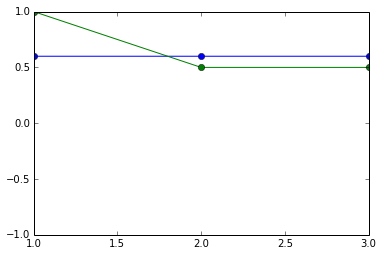

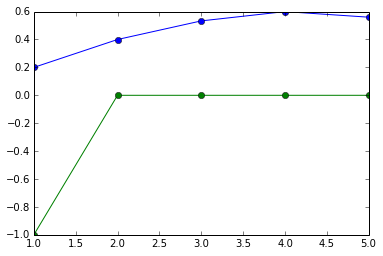

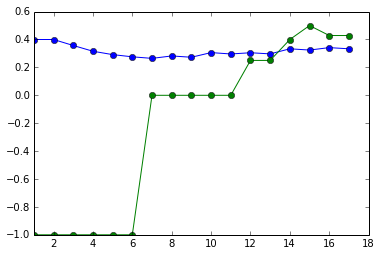

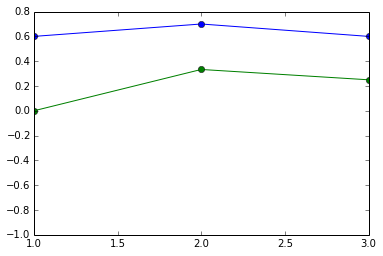

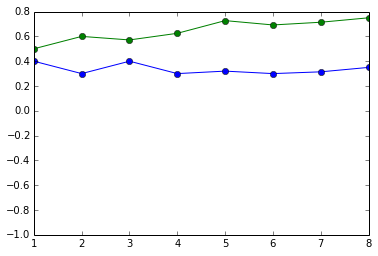

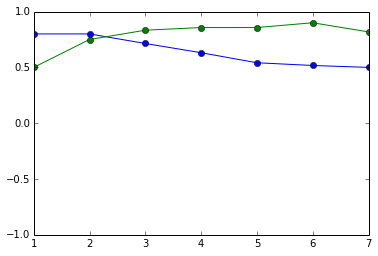

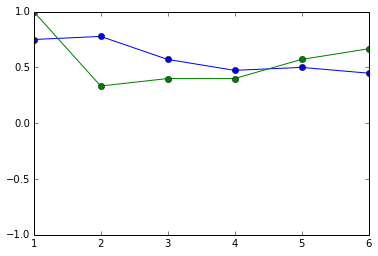

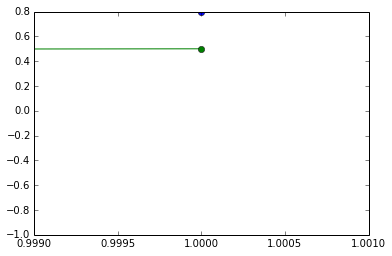

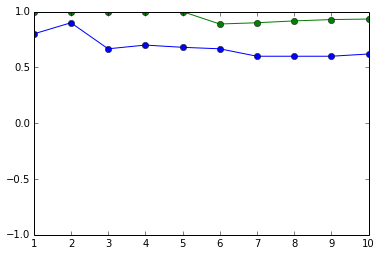

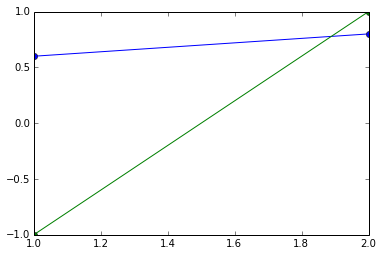

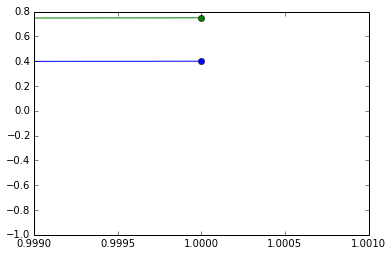

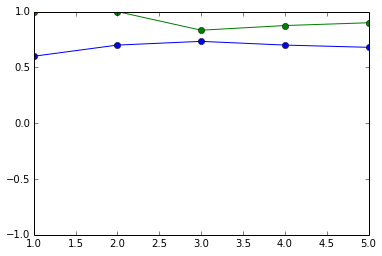

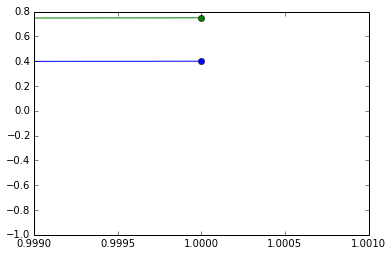

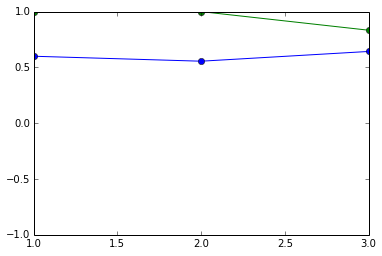

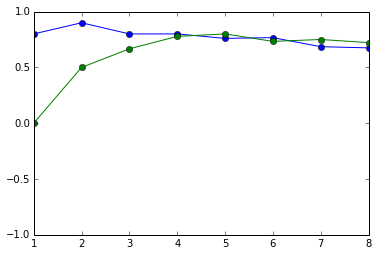

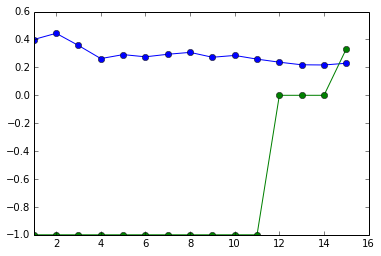

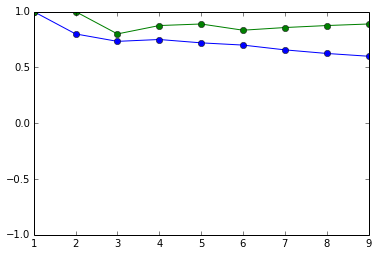

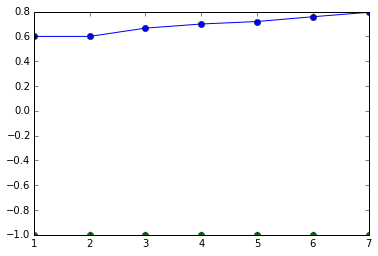

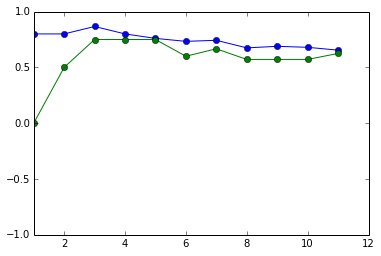

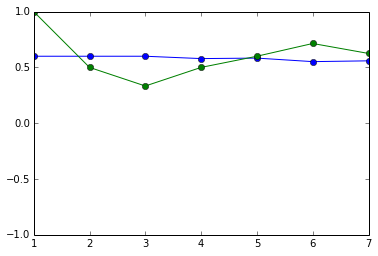

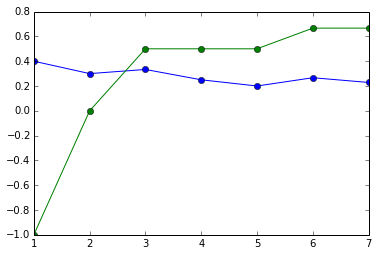

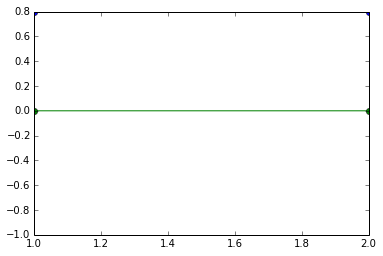

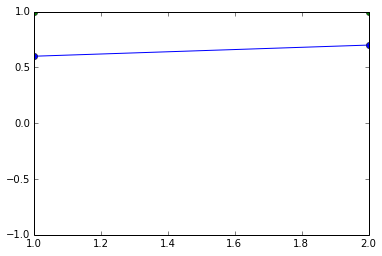

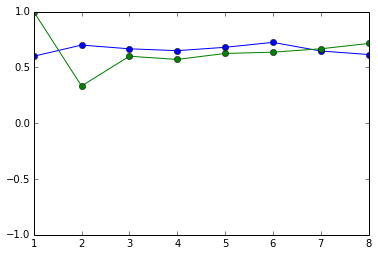

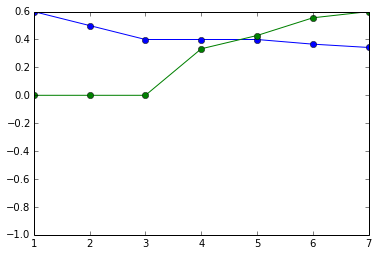

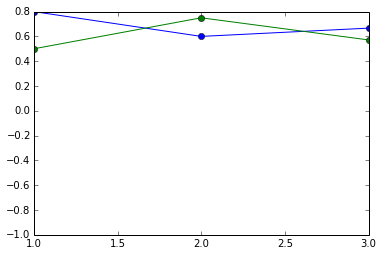

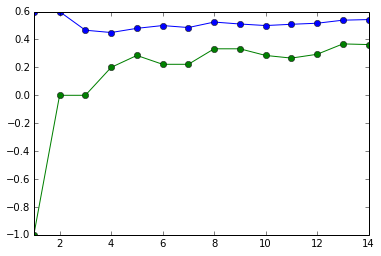

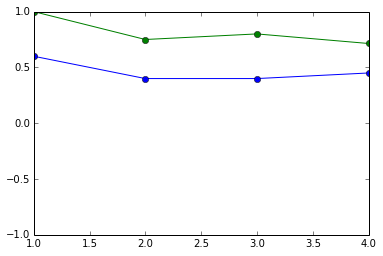

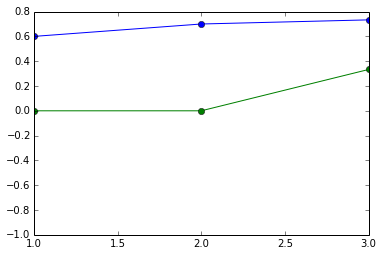

In [10]:
for ID in ID_lst_good_users[:,1]:
    user = dictUser_data[ID]
    scores=[]
    num_image_classified = 0 

#    counts_gz_accuracy = compute_all_accuracy(expert_subset,expert_options_list,user)
    plt.figure()
    e_accuracy = []
    s_accuracy = []
    prev = 0
    for i in np.arange(len(user)):
        if i%5==0:
            counts_expert_accuracy = compute_all_accuracy(gz_subset,gz_options_list,user[:i])
#             print "Elliptical: ", counts_expert_accuracy[14]
#             print "Spiral: ", counts_expert_accuracy[23]
            e_accuracy.append(counts_expert_accuracy[14])
            s_accuracy.append(counts_expert_accuracy[23])
            prev = i
    
    plt.plot(e_accuracy,'-o')
    plt.plot(s_accuracy,'-o')
    plt.xlim(1)
#     for session in user:
#         num_image_classified+=1
#         scores.append(session.score)
#     print num_image_classified

#### Looking at the general trend for Group A to see if there is significant differences 

In [3]:
cd ../zooniverse/scripts/

/Users/dorislee/Desktop/InventionLab/CitizenScienceEdu/citizen_sci_edu/zooniverse/scripts


In [4]:
import environment
from galaxyzoo.models import UserSession
from galaxyzoo.models import PrePostTest
os.chdir("scripts/")
from helper import *

In [5]:
dictUser_data = create_dictUser()
good_users=[2638,3957,1055,2506,7791,5872,7452,6082,9727,7339,8049,48427,54352,24066,90272,4315,38914,4332,9365,2335,5028,18887,30558,5817,7669,29984,2626,7620,8146,2006,9815,4056,9359,2117,4074,27757,6900,4991]
ID_lst_good_users =[]
for ID in good_users:
    for key,ulst in dictUser_data.iteritems():
        if ulst[0].user.username!='admin':
            if int(ulst[0].user.username)==int(ID):
                ID_lst_good_users.append([ID,key])
ID_lst_good_users = np.array(ID_lst_good_users)

/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/matplotlib/axes.py:2536: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1, right=1.0
  + 'left=%s, right=%s') % (left, right))

in singular transformations; automatically expanding.
left=1, right=1.0
  + 'left=%s, right=%s') % (left, right))



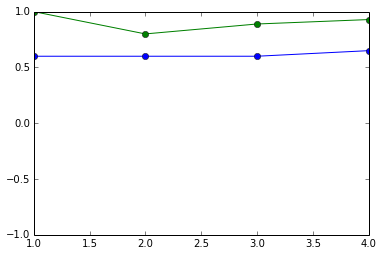

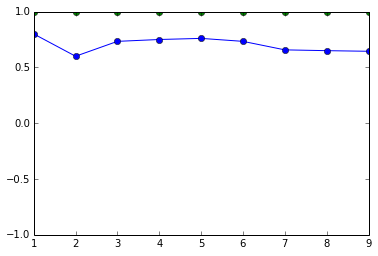

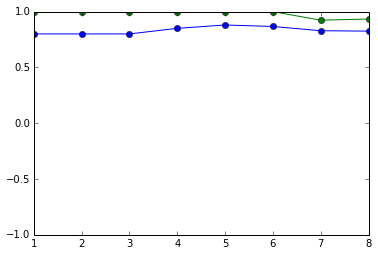

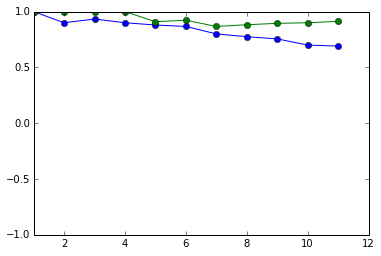

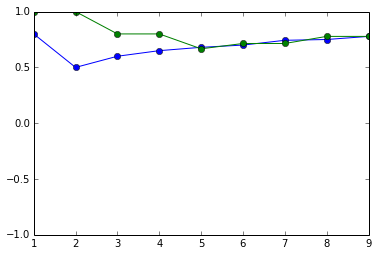

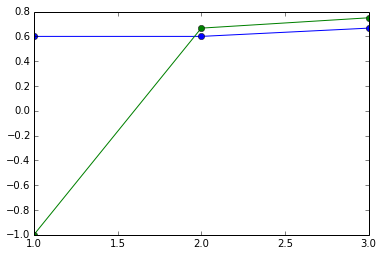

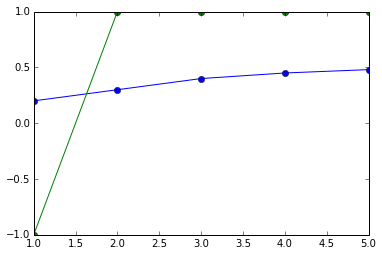

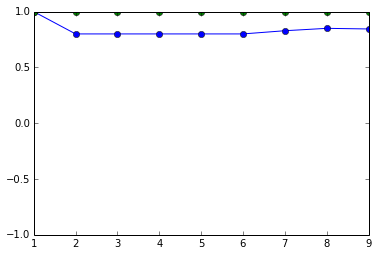

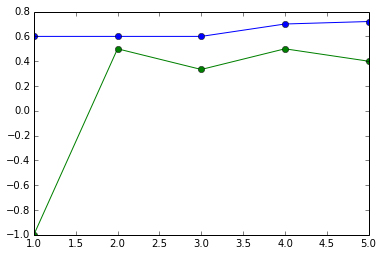

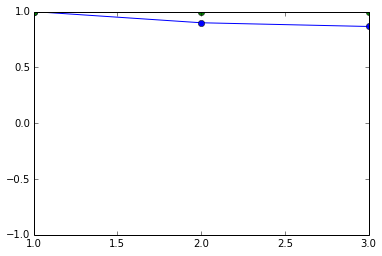

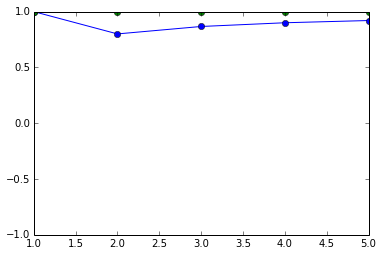

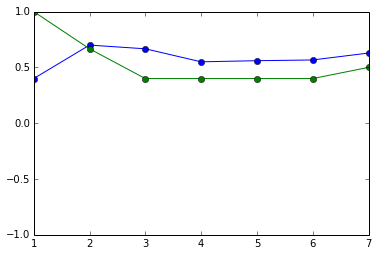

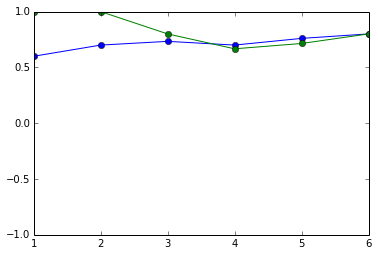

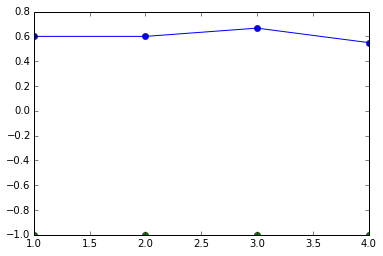

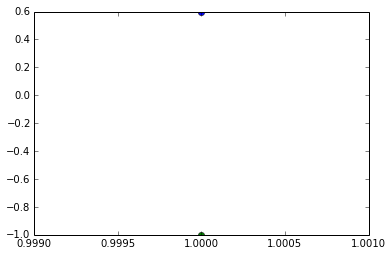

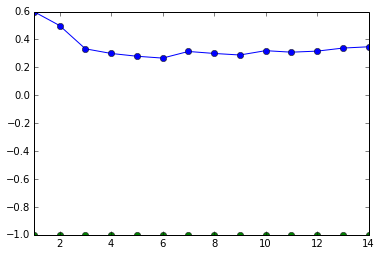

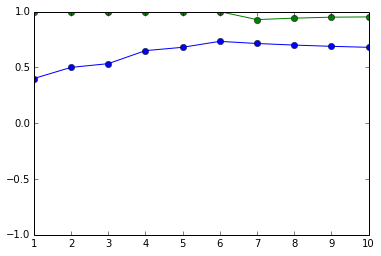

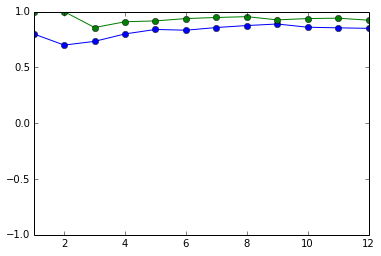

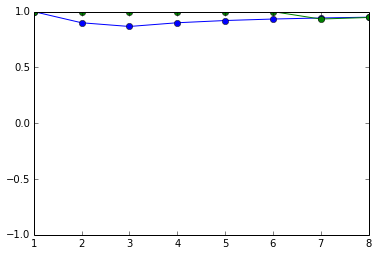

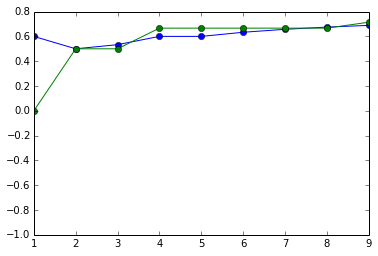

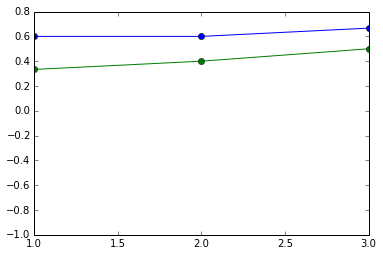

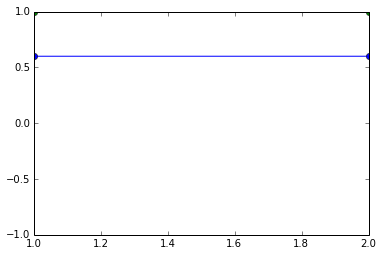

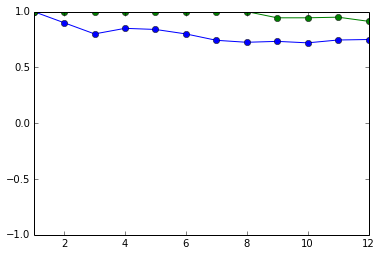

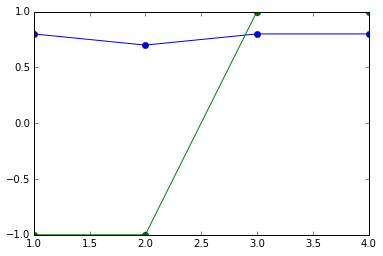

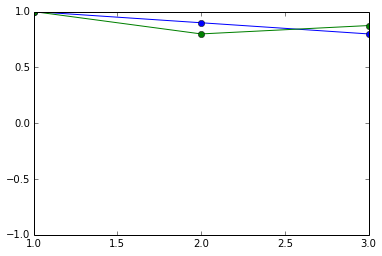

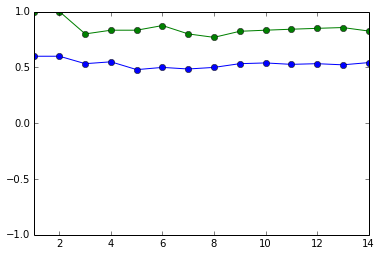

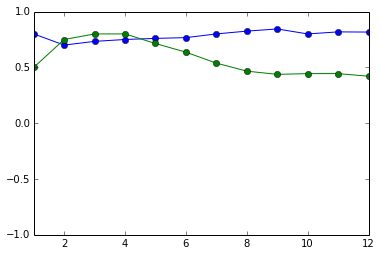

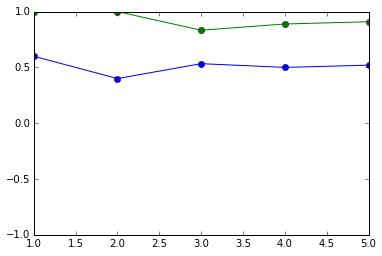

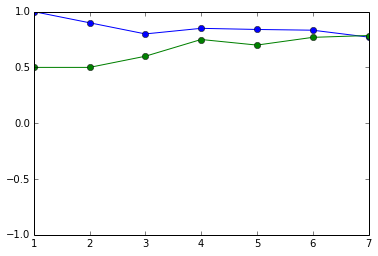

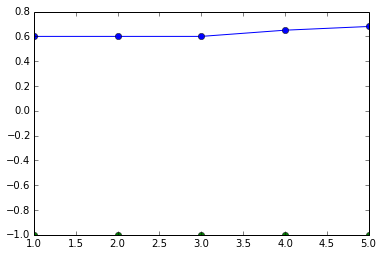

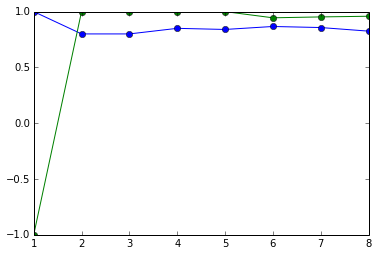

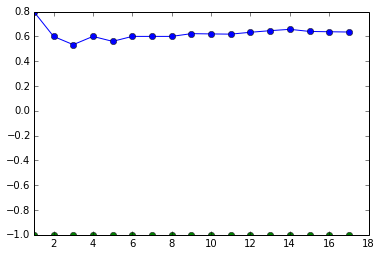

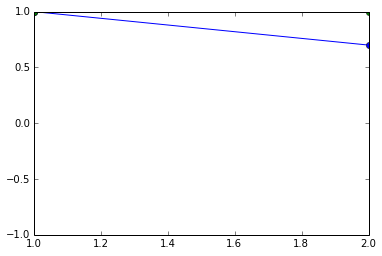

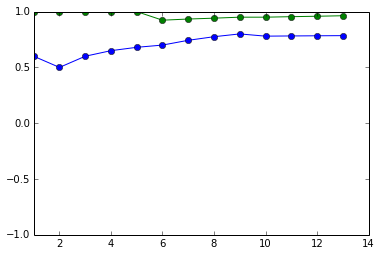

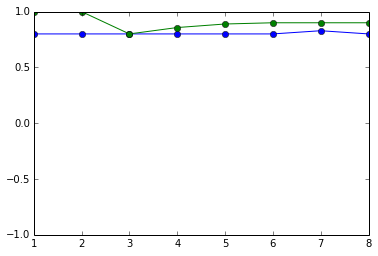

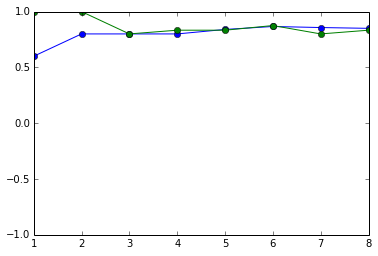

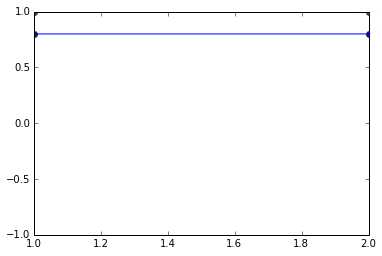

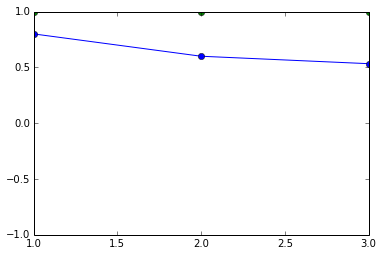

In [14]:
for ID in ID_lst_good_users[:,1]:
    user = dictUser_data[ID]
    scores=[]
    num_image_classified = 0 

#    counts_gz_accuracy = compute_all_accuracy(expert_subset,expert_options_list,user)
    plt.figure()
    e_accuracy = []
    s_accuracy = []
    prev = 0
    for i in np.arange(len(user)):
        if i%5==0:
#             counts_expert_accuracy = compute_all_accuracy(gz_subset,gz_options_list,user[prev:i])
            counts_expert_accuracy = compute_all_accuracy(gz_subset,gz_options_list,user[:i])
#             print "Elliptical: ", counts_expert_accuracy[14]
#             print "Spiral: ", counts_expert_accuracy[23]
            e_accuracy.append(counts_expert_accuracy[14])
            s_accuracy.append(counts_expert_accuracy[23])
            prev = i
    plt.plot(e_accuracy,'-o')
    plt.plot(s_accuracy,'-o')
    plt.xlim(1)
#     for session in user:
#         num_image_classified+=1
#         scores.append(session.score)
#     print num_image_classified